<a href="https://colab.research.google.com/github/mounishvatti/machine-learning/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
val = 10
print(val)

10


In [ ]:
var = tf.random.uniform([1])
print(var.numpy())

[0.15206623]


In [ ]:
def data_creation(w=0.1, b=0.5, n=100):
  X = tf.random.uniform(shape = (n,))
  # introducing noise in the data
  noise = tf.random.normal(shape = (n,), mean = 0.0, stddev = 0.01)
  Y = w * X + b + noise
  print(X)
  return X.numpy(), Y.numpy()

X, Y = data_creation(n = 100)


tf.Tensor(
[8.86262178e-01 1.23122811e-01 5.81051230e-01 7.74831772e-01
 2.64507294e-01 3.83211851e-01 4.42971230e-01 8.19629788e-01
 3.15567255e-02 4.25518751e-02 8.91983509e-02 4.71188307e-01
 1.09071970e-01 1.13694072e-01 2.03240871e-01 9.78864431e-01
 6.70329332e-01 4.12084103e-01 4.30570841e-02 7.89653659e-01
 9.85994101e-01 6.71867251e-01 4.95168209e-01 1.09478474e-01
 5.94412327e-01 2.80200481e-01 4.70306039e-01 5.19277573e-01
 1.24363303e-01 1.22064233e-01 2.40744233e-01 8.85875225e-01
 6.41546249e-02 1.00902915e-01 3.95064354e-02 9.44586396e-01
 1.93861008e-01 8.41421485e-01 6.38423800e-01 5.51997185e-01
 2.50762224e-01 2.54293442e-01 2.20857978e-01 8.56507897e-01
 7.00286865e-01 3.92436981e-04 4.61696625e-01 8.32019091e-01
 7.05572009e-01 8.65688682e-01 2.67669320e-01 6.98099732e-01
 2.50256062e-02 6.55702353e-01 5.86266041e-01 8.48415852e-01
 4.06616092e-01 1.02050781e-01 5.49721003e-01 9.43533778e-01
 8.96451235e-01 6.43644214e-01 7.78120041e-01 6.36317730e-01
 6.48338914e-

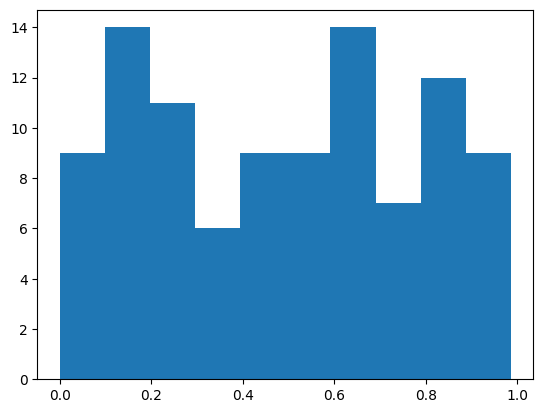

In [ ]:
%matplotlib inline
import matplotlib.pyplot as mpl
mpl.hist(X)
mpl.show()

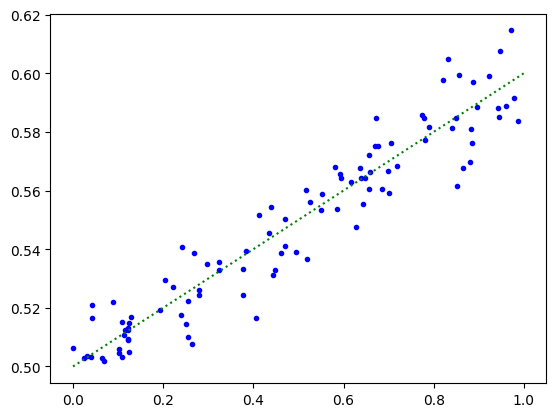

In [ ]:
w=0.1
b=0.5
mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b, 1*w+b], 'g:')

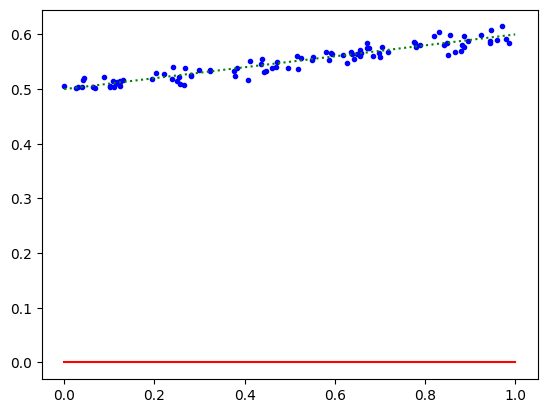

In [ ]:
w_guess = 0.0
b_guess = 0.0

mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b, 1*w+b], 'g:')
mpl.plot([0,1], [0*w_guess+b_guess, 1*w_guess+b_guess], 'r')


In [ ]:
def predict(x, w=w, b=b):
  y = w*x + b
  return y

In [ ]:
def mean_squared_error(y_true, y_pred):
  mse = tf.reduce_mean(tf.square(y_true - y_pred))
  return mse

In [ ]:
print(mean_squared_error(Y, predict(X)))

tf.Tensor(0.30161342, shape=(), dtype=float32)


In [ ]:
# w = tf.Variable(0.0)
# b = tf.Variable(-1.0)

learning_rate = 0.1
n_epochs = 200

for n in range (n_epochs):
    with tf.GradientTape() as tape:
        predictions = predict(X, w=w, b=b)
        loss = mean_squared_error(Y, predictions)

    gradients = tape.gradient(loss, [w, b])
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if n % 20 == 0:
        print(f"Epoch: {n}, Loss: {loss}")


Epoch: 0, Loss: 0.00018013865337707102
Epoch: 20, Loss: 0.00014039124653209
Epoch: 40, Loss: 0.00011779972555814311
Epoch: 60, Loss: 0.00010495899186935276
Epoch: 80, Loss: 9.766062430571765e-05
Epoch: 100, Loss: 9.351236803922802e-05
Epoch: 120, Loss: 9.115456487052143e-05
Epoch: 140, Loss: 8.981442806543782e-05
Epoch: 160, Loss: 8.905273716663942e-05
Epoch: 180, Loss: 8.861974492901936e-05


In [ ]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.10034772>

In [ ]:
b

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.4992144>

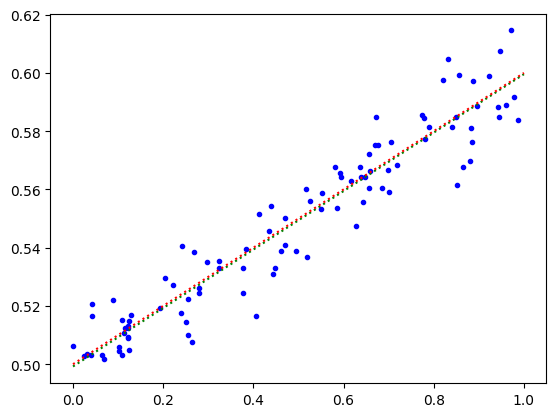

In [ ]:
w_true = 0.1
b_true = 0.5

mpl.plot(X, Y, 'b.')
mpl.plot([0,1], [0*w+b, 1*w+b], 'g:')
mpl.plot([0,1], [0*w_true+b_true, 1*w_true+b_true], 'r:')